<h1> Team 1 - Group Project - Movie Recommendations</h1>

<h3> Team Members:<h3>
<h4> Abhinav Kashyap <br> Pam Askins <br> Shiyi Li <br> Xinfang Zhang <br> Mason Hansen <h4>

<h5> Read the given datasets <h5>

In [1]:
import pandas as pd
import numpy as np
# pass in column names for each CSV and read them using pandas. 
# Column names available in the readme file

In [2]:
#Reading users file:
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users = pd.read_csv('ml-1m/users.dat', sep='::', names=u_cols,
 encoding='latin-1', engine = 'python')

In [3]:
#Reading the ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', names = r_cols, encoding = 'latin-1', engine = 'python')

In [4]:
#Reading movies file:
i_cols = ['movie_id', 'title' ,'genre']

movies = pd.read_csv('ml-1m/movies.dat', sep='::', names=i_cols, encoding='latin-1', engine = 'python')

Lets take a look at the data files

In [5]:
print (users.shape)
users.head()

(6040, 5)


,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
print (ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
print (movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<h3> Exploratory Data Analysis <h3>

In [8]:
#Merging the movies and ratings data
movie_ratings = movies.merge(ratings, on = 'movie_id', how = 'inner')
print (movie_ratings.shape)
movie_ratings.head()

(1000209, 6)


,movie_id,title,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
#Display highly rated movies
high_rated = movie_ratings['rating'] >= 4.0
movie_ratings[high_rated].head(10)

,movie_id,title,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614
11,1,Toy Story (1995),Animation|Children's|Comedy,34,5,978102970
12,1,Toy Story (1995),Animation|Children's|Comedy,36,5,978061285


In [10]:
#Display low rated movies
low_rated = movie_ratings['rating'] < 4.0
movie_ratings[low_rated].head(10)

,movie_id,title,genre,user_id,rating,timestamp
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703
10,1,Toy Story (1995),Animation|Children's|Comedy,28,3,978985309
22,1,Toy Story (1995),Animation|Children's|Comedy,68,3,991376026
23,1,Toy Story (1995),Animation|Children's|Comedy,73,3,977867812
27,1,Toy Story (1995),Animation|Children's|Comedy,80,3,977786904
28,1,Toy Story (1995),Animation|Children's|Comedy,90,3,993872933
31,1,Toy Story (1995),Animation|Children's|Comedy,99,3,982873678
34,1,Toy Story (1995),Animation|Children's|Comedy,114,3,977506130
35,1,Toy Story (1995),Animation|Children's|Comedy,117,3,977498304


In [11]:
#count the number of unique users and movies.
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


In [12]:
#Total number of unique genres
unique_genre = movies['genre'].unique().tolist()
len(unique_genre)

301

In [13]:
#Top 25 most rated movies
most_rated = movie_ratings.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [14]:
#Top 15 highest rated movies
highest_rated = movie_ratings.groupby('title').agg({'rating': [np.size, np.mean]})

#The above movies are rated so rarely that we can't count them as quality films. 
#Let's only look at movies that have been rated at least 100 times.

atleast_100 = highest_rated['rating']['size'] >= 100
highest_rated[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941

In [15]:
# create Dataframe: ratings count per movie
ratingCount = pd.DataFrame(movie_ratings.groupby('title', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'ratingCount'}))
ratingCount.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672


In [16]:
# create Dataframe: mean rating per movie
ratingMean = pd.DataFrame(movie_ratings.groupby('title', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'ratingMean'}))
ratingMean.sort_values('ratingMean',ascending=False).head(5)

,title,ratingMean
3477,Ulysses (Ulisse) (1954),5.0
2025,Lured (1947),5.0
1203,Follow the Bitch (1998),5.0
407,Bittersweet Motel (2000),5.0
3087,Song of Freedom (1936),5.0


In [17]:
# create Dataframe: ratings count and mean rating per movie
movies_ext = pd.merge(ratingCount,ratingMean, on='title')
movies_ext.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount,ratingMean
127,American Beauty (1999),3428,4.317386
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
3154,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
1789,Jurassic Park (1993),2672,3.763847


In [18]:
# create Dataframe: ratings count per value
rating_dist= pd.DataFrame(ratings.groupby('rating', as_index = False)['user_id'].count()
                         .rename(columns={'user_id' : 'ratingCount'}))
rating_dist.head(10)

,rating,ratingCount
0,1,56174
1,2,107557
2,3,261197
3,4,348971
4,5,226310


In [19]:
# the users with most ratings
ratings_per_user = ratings[['user_id', 'movie_id']].groupby('user_id').count()
ratings_per_user = ratings_per_user.rename(columns={'movie_id' : 'Total'})
ratings_per_user.sort_values('Total',ascending=False).head()

,Total
user_id,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521


In [20]:
# users per gender 
users_by_gender = users.groupby('sex', as_index = False)['user_id'].count()
users_by_gender.rename(columns={'user_id' : 'Total'}).head()

,sex,Total
0,F,1709
1,M,4331


In [21]:
# users per occupation (top 5)
users_by_occ =users.groupby('occupation', as_index = False)['user_id'].count()
users_by_occ = users_by_occ.rename(columns={'user_id' : 'Total'})
users_by_occ.sort_values('Total',ascending=False).head()

,occupation,Total
4,4,759
0,0,711
7,7,679
1,1,528
17,17,502


In [22]:
# most popular genres (with most ratings)
most_popular_genre = movie_ratings.groupby('genre', as_index = False)['user_id'].count()
most_popular_genre = most_popular_genre.rename(columns={'user_id' : 'Total ratings'})
most_popular_genre.sort_values('Total ratings',ascending=False).head(10)

,genre,Total ratings
176,Comedy,116883
239,Drama,111423
207,Comedy|Romance,42712
185,Comedy|Drama,42245
252,Drama|Romance,29170
92,Action|Thriller,26759
274,Horror,22563
260,Drama|Thriller,18248
298,Thriller,17851
33,Action|Adventure|Sci-Fi,17783


In [23]:
# movies distribution per genres
movies_genre = movies.groupby('genre', as_index = False)['movie_id'].count()
movies_genre = movies_genre.rename(columns={'movie_id' : 'Total ratings'})
movies_genre.sort_values('Total ratings',ascending=False).head(10)

,genre,Total ratings
239,Drama,843
176,Comedy,521
274,Horror,178
185,Comedy|Drama,162
207,Comedy|Romance,142
252,Drama|Romance,134
235,Documentary,116
298,Thriller,101
0,Action,65
260,Drama|Thriller,63


<h3> Visualizations </h3>

In [24]:
# import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# select plot style
plt.style.use('ggplot')

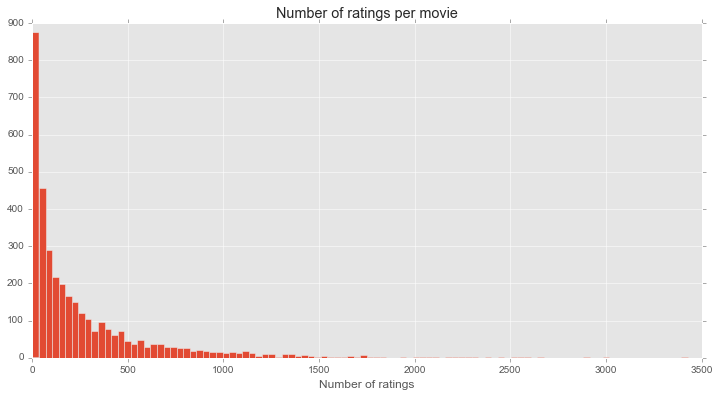

In [25]:
# the graph indicates that most of the movies have less than 40000 ratings
plt.figure(figsize=(12,6))
movies_ext[movies_ext['ratingCount'] > 1]['ratingCount'].hist(bins=100)
plt.title('Number of ratings per movie')
plt.xlabel('Number of ratings')

/Users/abhinavkashyap/anaconda2/envs/gl-env/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


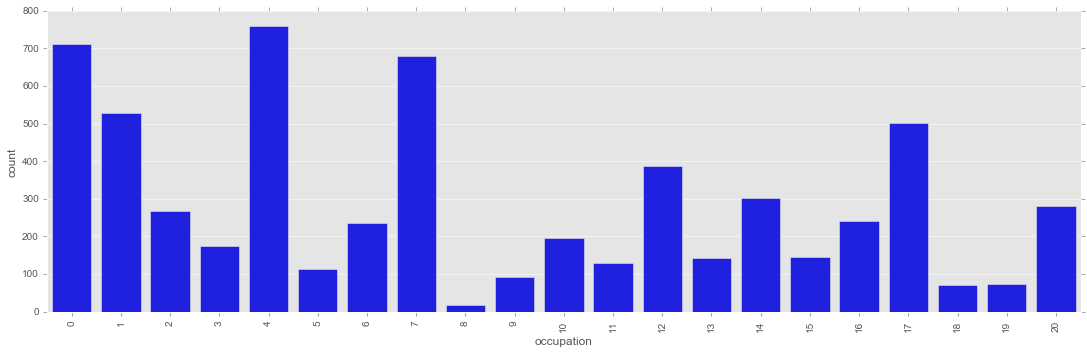

In [26]:
# most of the viewers are students and managerial executuves
sns.factorplot("occupation", data=users, aspect=3, kind="count", color="b").set_xticklabels(rotation=90)

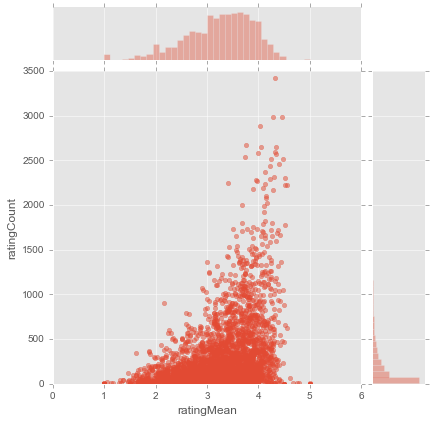

In [27]:
# the movies with the most ratings tend to have better rankings
sns.jointplot(x='ratingMean',y='ratingCount',data= movies_ext,alpha=0.5)

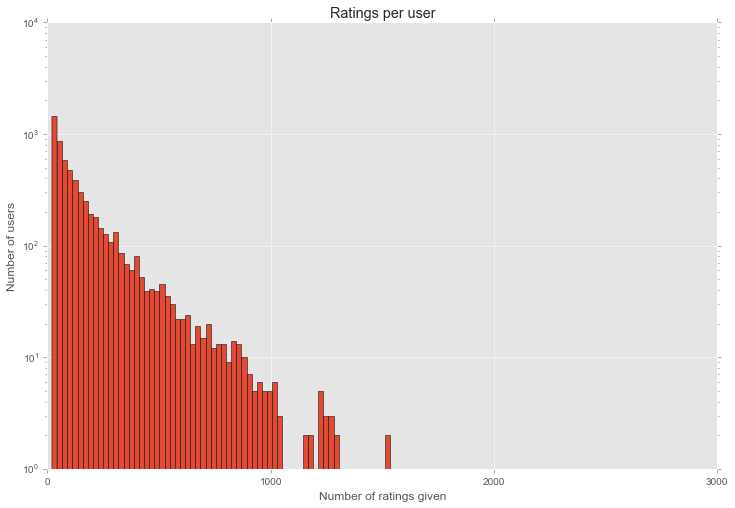

In [28]:
# most users have less than 1000 ratings
plt.figure(figsize=(12,8))
ratings_per_user['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of users')
plt.xlim(0,)
plt.xticks(np.arange(0,4000,1000))
plt.show()

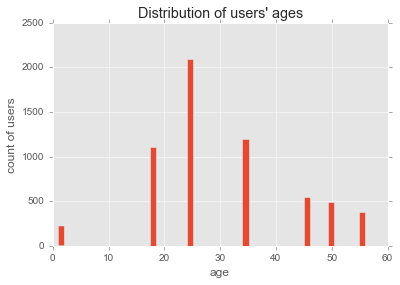

In [29]:
#Distribution of users age
users.age.plot.hist(bins=50)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

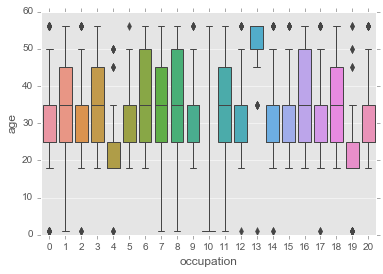

In [30]:
sns.boxplot(x = 'occupation',y ='age',  data = users)

In [31]:
#Segregating the genre names into a wide dataframe represented by 1's and 0's
movies_categorical= movies.genre.str.get_dummies('|')
movies_categorical.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
movies_combined=pd.merge(movies,movies_categorical,left_index=True,right_index=True)
#movies_combined.to_csv('movies_comb.csv',index=False)
movies_combined.head()

,movie_id,title,genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<br><h1> Building Recommendation Engines - Different models <h1>

<h3> Finding similarities between movies </h3>

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [33]:
ratings_mean_count = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean()) 

In [34]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count()) 

In [35]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


In [36]:
#Create a matrix of movie titles and user ratings
user_movie_rating = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')
user_movie_rating.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:  The above matrix will have a lot of null values since every movie is not rated by every user.

We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

In [37]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()

user_id
1    NaN
2    5.0
3    NaN
4    NaN
5    1.0
Name: Forrest Gump (1994), dtype: float64

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [38]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()

/Users/abhinavkashyap/anaconda2/envs/gl-env/lib/python2.7/site-packages/numpy/lib/function_base.py:2079: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


,Correlation
title,
"$1,000,000 Duck (1971)",0.230769
'Night Mother (1986),0.339255
'Til There Was You (1997),0.059541
"'burbs, The (1989)",0.119454
...And Justice for All (1979),0.164293


In [39]:
#Adding rating_counts to the above dataframe
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()  

,Correlation,rating_counts
title,,
"$1,000,000 Duck (1971)",0.230769,37
'Night Mother (1986),0.339255,70
'Til There Was You (1997),0.059541,52
"'burbs, The (1989)",0.119454,303
...And Justice for All (1979),0.164293,199


In [40]:
#Considering only those movies with ratings > 50
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,2194
No Mercy (1986),0.519698,61
Groove (2000),0.498724,51
Prick Up Your Ears (1987),0.478797,77
Date with an Angel (1987),0.472535,51


So, this suggests that the user who likes Forest Gump would have an approximately 50% chance to see the movie 'No Mercy', 'Groove', etc.
This is a fairly low correlation, suggesting that our recommendation model is very poor. Hence, we try other recommendation models to improve our suggestions.

<h3>Building basic Recommendation Systems - Using Graphlab library </h3>

#Before importing the graphlab library, you'll have to follow the following steps:
Refer the links below and follow the instructions - https://arjunkrishnababu96.github.io/Getting-Started-With-GraphLab-Create/ <br>
https://turi.com/download/install-graphlab-create-command-line.html

Use the email id and product key as follows: <br>
Registered Email Id: kashyaa2@uci.edu <br>
Product key: 9064-7E88-DAE7-748B-4FF6-A84C-71A1-66F3

In [41]:
import graphlab

In [42]:
#Split the ratings data into training and testing set
from sklearn import cross_validation as cv
training_data, testing_data = cv.train_test_split(movie_ratings, test_size=0.25)

In [43]:
#Since we’ll be using GraphLab, lets convert the training and testing dataset into SFrames.
train_data = graphlab.SFrame(training_data)
test_data = graphlab.SFrame(testing_data)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1553040044.log


This non-commercial license of GraphLab Create for academic use is assigned to kashyaa2@uci.edu and will expire on March 01, 2020.


In [44]:
train_data.head(5)

movie_id,title,genre,user_id,rating,timestamp
2395,Rushmore (1998),Comedy,553,4,976059180
2762,"Sixth Sense, The (1999)",Thriller,5327,5,961102223
3269,Forever Young (1992),Adventure|Romance|Sci-Fi,3589,1,966657182
928,Rebecca (1940),Romance|Thriller,731,5,975528115
3334,Key Largo (1948),Crime|Drama|Film-Noir|Thriller ...,4655,4,963900095


<h3><I> Simple Popularity Model: </I></h3>

<h5>Lets start with making a popularity based model, i.e. the one where all the users have same recommendation based on the most popular choices. We’ll use the  graphlab recommender functions popularity_recommender for this.</h5>

In [45]:
movie_ratings.head()

,movie_id,title,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [46]:
popularity_model = graphlab.popularity_recommender.create(train_data, user_id='user_id',
                                                          item_id='title', target='rating')

Recsys training: model = popularity

Warning: Ignoring columns movie_id, genre, timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 750156 observations with 6040 users and 3677 items.

Data prepared in: 0.669179s

750156 observations to process; with 3677 unique items.

Arguments for the above function are:

train_data: the SFrame which contains the required data <br>
user_id: the column name which represents each user ID <br>
item_id: the column name which represents each item to be recommended <br>
target: the column name representing scores/ratings given by the user

<h4>Lets use this model to make top 5 recommendations for first 5 users and see what comes out:</h4>

In [47]:
#Get recommendations for first 5 users and print them
#users = range(1,6) specifies user ID of first 5 users
#k=5 specifies top 5 recommendations to be given
popularity_recomm = popularity_model.recommend(users=range(1,6),k=5)
popularity_recomm.print_rows(num_rows=15)

+---------+-------------------------------+-------+------+
| user_id |             title             | score | rank |
+---------+-------------------------------+-------+------+
|    1    |    Bittersweet Motel (2000)   |  5.0  |  1   |
|    1    |    Follow the Bitch (1998)    |  5.0  |  2   |
|    1    |        Baby, The (1973)       |  5.0  |  3   |
|    1    | I Am Cuba (Soy Cuba/Ya Kub... |  5.0  |  4   |
|    1    |          Lured (1947)         |  5.0  |  5   |
|    2    |    Bittersweet Motel (2000)   |  5.0  |  1   |
|    2    |    Follow the Bitch (1998)    |  5.0  |  2   |
|    2    |        Baby, The (1973)       |  5.0  |  3   |
|    2    | I Am Cuba (Soy Cuba/Ya Kub... |  5.0  |  4   |
|    2    |          Lured (1947)         |  5.0  |  5   |
|    3    |    Bittersweet Motel (2000)   |  5.0  |  1   |
|    3    |    Follow the Bitch (1998)    |  5.0  |  2   |
|    3    |        Baby, The (1973)       |  5.0  |  3   |
|    3    | I Am Cuba (Soy Cuba/Ya Kub... |  5.0  |  4  

The recommendations for all users are same and in the same order. This is becasue all the recommended movies have an average rating of 5, i.e. all the users who watched the movie gave a top rating. Thus we can see that our popularity system works as expected however it is not a good movie recommendeder system.

<h3> A collaborative filtering model <h3>

Lets start by understanding the basics of a collaborative filtering algorithm. The core idea works in 2 steps:

    1. Find similar items by using a similarity metric
    2. For a user, recommend the items most similar to the items (s)he already likes

To give you a high level overview, this is done by making an item-item matrix in which we keep a record of the pair of items which were rated together.

In this case, an item is a movie. Once we have the matrix, we use it to determine the best recommendations for a user based on the movies he has already rated.

In [48]:
#Train Model
item_sim_model = graphlab.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', 
                                                             target='rating', similarity_type='pearson')

Recsys training: model = item_similarity

Warning: Ignoring columns title, genre, timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 750156 observations with 6040 users and 3677 items.

Data prepared in: 0.510905s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.117ms                        | 16.5       |

| 26.514ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 58.603ms                            | 0                | 0               |

| 1.06s                               | 46.75            | 1726            |

| 2.06s                               | 91               | 3353            |

| 2.37s                               | 100              | 3677            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 3.4421s

In [49]:
#Make Recommendations:
item_sim_recomm = item_sim_model.recommend(users=range(1,6),k=5)
item_sim_recomm.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   3172   |  5.0  |  1   |
|    1    |   3881   |  5.0  |  2   |
|    1    |   3280   |  5.0  |  3   |
|    1    |   3245   |  5.0  |  4   |
|    1    |   3656   |  5.0  |  5   |
|    2    |   3172   |  5.0  |  1   |
|    2    |   3881   |  5.0  |  2   |
|    2    |   3280   |  5.0  |  3   |
|    2    |   3245   |  5.0  |  4   |
|    2    |   3656   |  5.0  |  5   |
|    3    |   3172   |  5.0  |  1   |
|    3    |   3881   |  5.0  |  2   |
|    3    |   3280   |  5.0  |  3   |
|    3    |   3245   |  5.0  |  4   |
|    3    |   3656   |  5.0  |  5   |
|    4    |   3172   |  5.0  |  1   |
|    4    |   3881   |  5.0  |  2   |
|    4    |   3280   |  5.0  |  3   |
|    4    |   3245   |  5.0  |  4   |
|    4    |   3656   |  5.0  |  5   |
|    5    |   3172   |  5.0  |  1   |
|    5    |   3881   |  5.0  |  2   |
|    5    |   3280   |  5.0  |  3   |
|    5    | 

<h3> Evaluating the 2 models - Popularity and Collaborative Filtering Models <h3>

For evaluating recommendation engines, we can use the concept of precision-recall.

Recall: <br>
What ratio of items that a user likes were actually recommended.
If a user likes say 5 items and the recommendation decided to show 3 of them, then the recall is 0.6

Precision <br>
Out of all the recommended items, how many the user actually liked?
If 5 items were recommended to the user out of which he liked say 4 of them, then precision is 0.8
Now if we think about recall, how can we maximize it? If we simply recommend all the items, they will definitely cover the items which the user likes. So we have 100% recall! But think about precision for a second. If we recommend say 1000 items and user like only say 10 of them then precision is 0.1%. This is really low. Our aim is to maximize both precision and recall.

An ideal recommender system is the one which only recommends the items which user likes. So in this case precision=recall=1. This is an optimal recommender and we should try and get as close as possible.

Lets compare both the models we have built till now based on precision-recall characteristics:

In [50]:
model_performance = graphlab.compare(test_data, [popularity_model, item_sim_model])
graphlab.show_comparison(model_performance,[popularity_model, item_sim_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/6039 queries. users per second: 22487.6

recommendations finished on 2000/6039 queries. users per second: 20642.4

recommendations finished on 3000/6039 queries. users per second: 20281.1

recommendations finished on 4000/6039 queries. users per second: 20142.9

recommendations finished on 5000/6039 queries. users per second: 19816.1

recommendations finished on 6000/6039 queries. users per second: 19253.5


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    | 0.000496770988574 | 7.87095748077e-06 |
|   2    | 0.000248385494287 | 7.87095748077e-06 |
|   3    | 0.000220787106033 | 9.31087338968e-06 |
|   4    | 0.000206987911906 |  2.113875407e-05  |
|   5    |  0.00019870839543 | 2.38095658365e-05 |
|   6    | 0.000165590329525 | 2.38095658365e-05 |
|   7    | 0.000141934568164 | 2.38095658365e-05 |
|   8    | 0.000144891538334 | 2.53428096284e-05 |
|   9    | 0.000183989255028 | 3.46783622441e-05 |
|   10   | 0.000182149362477 | 4.74160798998e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/6039 queries. users per second: 13743.8

recommendations finished on 2000/6039 queries. users per second: 12902

recommendations finished on 3000/6039 queries. users per second: 12913.3

recommendations finished on 4000/6039 queries. users per second: 12672

recommendations finished on 5000/6039 queries. users per second: 12945.3

recommendations finished on 6000/6039 queries. users per second: 13031.7


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    | 0.000165590329525 | 2.67081176653e-06 |
|   2    | 8.27951647624e-05 | 2.67081176653e-06 |
|   3    | 5.51967765083e-05 | 2.67081176653e-06 |
|   4    | 8.27951647624e-05 | 6.05020624663e-06 |
|   5    | 9.93541977149e-05 | 7.00737578145e-06 |
|   6    | 0.000110393553017 | 8.31123664385e-06 |
|   7    | 9.46230454427e-05 | 8.31123664385e-06 |
|   8    | 8.27951647624e-05 | 8.31123664385e-06 |
|   9    | 0.000128792478519 | 3.84400994607e-05 |
|   10   | 0.000165590329525 | 5.89074755945e-05 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

Model compare metric: precision_recall
Canvas is accessible via web browser at the URL: http://localhost:51705/index.html
Opening Canvas in default web browser.


Here we can make 2 very quick observations:

The item similarity model is definitely better than the popularity model (by atleast 10x)
On an absolute level, even the item similarity model appears to have a poor performance. It is far from being a useful recommendation system.

<h3>Singular Vector Decomposition (SVD) Model for Movie Recommendations<h3>

In [51]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
R = Ratings.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [53]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print 'The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%'

The sparsity level of MovieLens1M dataset is 95.5%


Scipy and Numpy both have functions to do the singular value decomposition. I'm going to use the Scipy function svds because it let's me choose how many latent factors I want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [54]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

As I'm going to leverage matrix multiplication to get predictions, I'll convert the values to the diagonal matrix form.

In [55]:
sigma = np.diag(sigma)

Making Predictions from the Decomposed Matrices
I now have everything I need to make movie ratings predictions for every user. I can do it all at once by following the math and matrix multiply U, Diagonal Matrices, and V back to get the rank k=50 approximation of A.

But first, I need to add the user means back to get the actual star ratings prediction.

In [56]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

With the predictions matrix for every user, I can build a function to recommend movies for any user. I return the list of movies the user has already rated, for the sake of comparison.

In [57]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


Now we write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. Though I didn't use any explicit movie content features (such as genre or title), We will merge in that information to get a more complete picture of the recommendations.

In [58]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [59]:
#Let's try to recommend 20 movies for user with ID 1310.
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [60]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,user_id,movie_id,rating,timestamp,title,genre
5,1310,2248,5,974781573,Say Anything... (1989),Comedy|Drama|Romance
6,1310,2620,5,974781573,This Is My Father (1998),Drama|Romance
7,1310,3683,5,974781935,Blood Simple (1984),Drama|Film-Noir
15,1310,1704,5,974781573,Good Will Hunting (1997),Drama
1,1310,1293,5,974781839,Gandhi (1982),Drama
12,1310,3101,4,974781573,Fatal Attraction (1987),Thriller
11,1310,1343,4,974781534,Cape Fear (1991),Thriller
20,1310,2000,4,974781892,Lethal Weapon (1987),Action|Comedy|Crime|Drama
18,1310,3526,4,974781892,Parenthood (1989),Comedy|Drama
17,1310,3360,4,974781935,Hoosiers (1986),Drama


In [61]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movie_id,title,genre
1618,1674,Witness (1985),Drama|Romance|Thriller
1880,1961,Rain Man (1988),Drama
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1216,1242,Glory (1989),Action|Drama|War
1202,1225,Amadeus (1984),Drama
1273,1302,Field of Dreams (1989),Drama
1220,1246,Dead Poets Society (1989),Drama
1881,1962,Driving Miss Daisy (1989),Drama
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance


These look like pretty good recommendations. It's good to see that, although we didn't actually use the genre of the movie as a feature, the truncated matrix factorization features "picked up" on the underlying tastes and preferences of the user. The model has recommended some comedy, drama, and romance movies - all of which were genres of some of this user's top rated movies.

<h5> SVD Model Evaluation <h5>

In [62]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD, evaluate

In [63]:
# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Split the dataset for 5-fold evaluation
data.split(n_folds=5)

In [64]:
# Use the SVD algorithm.
svd = SVD()

In [65]:
# Compute the RMSE of the SVD algorithm.
evaluate(svd, data, measures=['RMSE'])

/Users/abhinavkashyap/anaconda2/envs/gl-env/lib/python2.7/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Users/abhinavkashyap/anaconda2/envs/gl-env/lib/python2.7/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8750
------------
Fold 2
RMSE: 0.8754
------------
Fold 3
RMSE: 0.8724
------------
Fold 4
RMSE: 0.8719
------------
Fold 5
RMSE: 0.8744
------------
------------
Mean RMSE: 0.8738
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.87504819687576207,
                             0.87543160441464574,
                             0.8724174198897463,
                             0.87188613251889913,
                             0.87438000111003145]})

<b> An RMSE of 0.87 is very good considering we get the same result in each fold. Now, we can train the dataset and do our predictions <b>

In [66]:
trainset = data.build_full_trainset()
svd.train(trainset)

/Users/abhinavkashyap/anaconda2/envs/gl-env/lib/python2.7/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [67]:
ratings[ratings['user_id'] == 1310]

,user_id,movie_id,rating,timestamp
215928,1310,2988,3,974781935
215929,1310,1293,5,974781839
215930,1310,1295,2,974782001
215931,1310,1299,4,974781701
215932,1310,2243,4,974782001
215933,1310,2248,5,974781573
215934,1310,2620,5,974781573
215935,1310,3683,5,974781935
215936,1310,3685,4,974781935
215937,1310,1185,4,974781839


In [68]:
svd.predict(1310, 1994)

Prediction(uid=1310, iid=1994, r_ui=None, est=3.2439072100154043, details={u'was_impossible': False})

<b> For movie with ID 1994, I get an estimated prediction of 3.349. The recommender system works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie. <b>

<h1> Conclusion <h1>

To recap, we ran three different models using the machine learning Python GraphLab library to recommend movies to users based on the movie rating data.   We decided to use a sampling of models and picked a simple popularity algorithm, an item-to-item collaborative filtering algorithm and a singular vector decomposition (SVD) classifier algorithm and took 80% of our data to train these three separate models.

The SVD Classifier Model produced the most reasonable results and had the highest accuracy of our samples.